In [1]:
%matplotlib widget

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import datetime
import time
import timeit

import matplotlib.pyplot as plt
import pandas as pd
import gPhoton as gp
from gPhoton.gphoton_utils import read_lc
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from matplotlib.colors import LogNorm, Normalize
import astropy.io.fits as fits
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.wcs import WCS
from astropy.visualization.wcsaxes import SphericalCircle

In [4]:
import vasca.utils as vutils

In [5]:
# Event sky locations
locs = {
    "PS1-10jh": {
        "ra": 242.368075,
        "dec": 53.673492,
        "trans_type": "TDE",
        "pub_date": "2012",
    },
    "PS1-11af": {
        "ra": 149.36175,
        "dec": 3.23361,
        "trans_type": "TDE",
        "pub_date": "2013",
    },
    "D3-13": {
        "ra": 214.8741,
        "dec": 52.8684,
        "trans_type": "TDE",
        "pub_date": "2006",
    },
    "D1-9": {
        "ra": 36.3207,
        "dec": 4.5497,
        "trans_type": "TDE",
        "pub_date": "2008",
    },
    "D23H-1": {
        "ra": 352.99804167,
        "dec": 0.28738056,
        "trans_type": "TDE",
        "pub_date": "2009",
    },
    "PS1-13arp": {
        "ra": 184.604295,
        "dec": 46.616852,
        "trans_type": "SN2p",
        "pub_date": "2008",
    },
    "SN-2010aq": {
        "ra": 150.5405875,
        "dec": 1.23359444,
        "trans_type": "SN2p",
        "pub_date": "2010",
    },
    "test": {
        "ra": 176.919525856024,
        "dec": 0.255696872807351,
        "trans_type": "test",
        "pub_date": "0",
    },
}

df_locs = pd.DataFrame.from_dict(locs)
df_locs

,PS1-10jh,PS1-11af,D3-13,D1-9,D23H-1,PS1-13arp,SN-2010aq,test
ra,242.368075,149.36175,214.8741,36.3207,352.998042,184.604295,150.540587,176.919526
dec,53.673492,3.23361,52.8684,4.5497,0.287381,46.616852,1.233594,0.255697
trans_type,TDE,TDE,TDE,TDE,TDE,SN2p,SN2p,test
pub_date,2012,2013,2006,2008,2009,2008,2010,0


In [7]:
out_dir = "./out"

In [9]:
transient = "PS1-11af"
with fits.open(f"{out_dir}/{transient}_counts.fits") as hdul:
    data_counts = hdul[0].data
    wcs_counts = WCS(hdul[0].header)

with fits.open(f"{out_dir}/{transient}_counts.fits") as hdul:
    data_intensity = hdul[0].data
    wcs_intensity = WCS(hdul[0].header)
    
data = {
    transient: {
        "counts": {
            "data": data_counts,
            "wcs": wcs_counts,
            
        },
        "intensity": {
            "data": data_intensity,
            "wcs": wcs_intensity,
            
        },
    },
}

In [10]:
#norm = ImageNormalize(stretch=SqrtStretch())

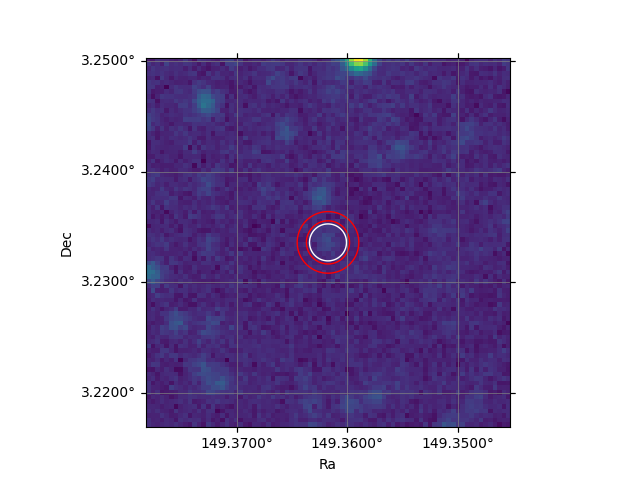

In [13]:
for kind in ["counts"]:
    num = f"{transient}_{kind}"
    plt.close(num)
    fig = plt.figure(num=num)
    ax = plt.subplot(projection=data[transient][kind]["wcs"])

    ax.imshow(data[transient][kind]["data"], norm=LogNorm())
    
    phot_center = SkyCoord(ra=df_locs[transient].ra*u.deg, dec=df_locs[transient].dec*u.deg, frame="icrs")
    s_phot = SphericalCircle(
        phot_center,
        (6 * u.arcsec).to(u.deg),
        edgecolor='white',
        facecolor='none',
        transform=ax.get_transform('world')
    )
    s_inner = SphericalCircle(
        phot_center,
        (7 * u.arcsec).to(u.deg),
        edgecolor='red',
        facecolor='none',
        transform=ax.get_transform('world')
    )
    s_outer = SphericalCircle(
        phot_center,
        (10 * u.arcsec).to(u.deg),
        edgecolor='red',
        facecolor='none',
        transform=ax.get_transform('world')
    )
    ax.add_patch(s_phot)
    ax.add_patch(s_inner)
    ax.add_patch(s_outer)

    ax.coords["ra"].set_major_formatter("d.dddd")
    ax.coords["dec"].set_major_formatter("d.dddd")
    ax.set_xlabel("Ra")
    ax.set_ylabel("Dec")
    ax.coords.grid(True, color="grey", ls="-", lw=0.5)